In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/TamarGurfinkel/project_1/refs/heads/main/%D7%93%D7%90%D7%98%D7%94%20%D7%9C%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98.csv'
df = pd.read_csv(url)
df.columns

Index(['year', 'state', 'division', 'total_population', 'fss', 'homicide_rate',
       'firearm_homicide_rate', 'nonfirearm_homicide_rate', 'firearm_suicides',
       'total_suicides', 'firearm_homicides', 'nonfirearm_homicides',
       'total_homicides', 'white_fss', 'nonwhite_fss', 'nextyearfss',
       'nextyearnonwhitefss', 'nextyearwhitefss'],
      dtype='object')

In [3]:
df.head()
df.tail()

,year,state,division,total_population,fss,homicide_rate,firearm_homicide_rate,nonfirearm_homicide_rate,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss,nextyearfss,nextyearnonwhitefss,nextyearwhitefss
3646,2020,Virginia,South Atlantic,8590563.0,0.580350,6.181201395,5.121899461,1.059301934,697,1201,440.0,91.0,531,0.594540,0.514151,NaN,NaN,NaN
3647,2020,Washington,Pacific,7693612.0,0.509901,4.185290342,2.742534976,1.442755366,618,1212,211.0,111.0,322,0.531191,0.363636,NaN,NaN,NaN
3648,2020,West Virginia,South Atlantic,1784787.0,0.621469,6.387316806,4.874531247,1.512785559,220,354,87.0,27.0,114,0.626113,0.529412,NaN,NaN,NaN
3649,2020,Wisconsin,East North Central,5832655.0,0.510393,5.726380182,4.337647264,1.388732918,442,866,253.0,81.0,334,0.516169,0.435484,NaN,NaN,NaN
3650,2020,Wyoming,Mountain,582328.0,0.703297,4.29311316,3.091041475,1.202071685,128,182,18.0,7.0,25,0.706215,0.600000,NaN,NaN,NaN


In [3]:
df.shape

(3651, 18)

In [11]:
df.dtypes

year                          int64
state                        object
division                     object
total_population            float64
fss                         float64
homicide_rate                object
firearm_homicide_rate        object
nonfirearm_homicide_rate     object
firearm_suicides              int64
total_suicides                int64
firearm_homicides           float64
nonfirearm_homicides        float64
total_homicides               int64
white_fss                   float64
nonwhite_fss                float64
nextyearfss                 float64
nextyearnonwhitefss         float64
nextyearwhitefss            float64
dtype: object

In [13]:
cols_to_convert = ['homicide_rate', 'firearm_homicide_rate', 'nonfirearm_homicide_rate']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
df.dtypes

year                          int64
state                        object
division                     object
total_population            float64
fss                         float64
homicide_rate               float64
firearm_homicide_rate       float64
nonfirearm_homicide_rate    float64
firearm_suicides              int64
total_suicides                int64
firearm_homicides           float64
nonfirearm_homicides        float64
total_homicides               int64
white_fss                   float64
nonwhite_fss                float64
nextyearfss                 float64
nextyearnonwhitefss         float64
nextyearwhitefss            float64
dtype: object

# plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='fss', errorbar=None)
plt.title("FSS Trend Over Time")
plt.xlabel("Year")
plt.ylabel("FSS (Firearm Suicide Share)")
plt.grid(True)
plt.show()
מבוא תיאורטי

## מהו מדד FSS ולמה הוא משמש?
FSS(קיצור של Firearm Suicide Share)
.הוא מדד עקיף להערכת שיעור החזקת נשק חם בבתים
המדד מחושב על ידי חלוקת מספר ההתאבדויות שבוצעו באמצעות נשק חם בסך כל מקרי ההתאבדויות במדינה ובשנה נתונה

לדוגמה:  
במדינה מסוימת התרחשו 100 התאבדויות, ו-40 מהן בוצעו באמצעות נשק חם.  
במקרה כזה, ערך המדד יהיה 0.4, כלומר 40% מהמקרים.

מדד זה מבוסס על ההנחה שככל שנשק חם נגיש יותר בבתים, כך עולה הסבירות שישמש גם במקרי התאבדות.  
מדובר במדד אמין מכיוון שהוא נשען על נתונים רשמיים ואובייקטיביים, ולא על סקרים שעשויים להיות מוטים חברתית.

---

## סקירה תמציתית של המאמר

הניתוח הנוכחי מבוסס על המאמר:  
**"State-level household gun ownership proxy dataset, 1949–2020" (Kang & Rasich, 2023)**.

המאמר מציג מאגר נתונים היסטורי רחב היקף, המאפשר להעריך את שיעור החזקת הנשק החם בבתים בארה"ב ברמת המדינות, לאורך תקופה של יותר מ-70 שנה.  
מאגר הנתונים נועד לסגור פערים היסטוריים במידע ולהבין את השפעות תרבות החזקת הנשק על החברה והבריאות הציבורית.

המאמר מדגיש כי קיים קשר חזק בין ערכי המדד לבין שיעורי מקרי הרצח בנשק חם ושיעורי ההתאבדויות.  
לכן, המדד מהווה אינדיקציה אמינה לשיעורי החזקת נשק במדינות השונות, גם בשנים בהן לא היו נתונים ישירים.

---

**במחקר הנוכחי נבדוק האם המסקנות של המאמר מתקיימות גם בניתוח הנתונים שבידינו.**

---

להרחבה, ניתן לעיין במאמר המלא בקישור הבא:  
[לצפייה במאמר (Kang & Rasich, 2023)](https://doi.org/10.1016/j.dib.2023.109548)


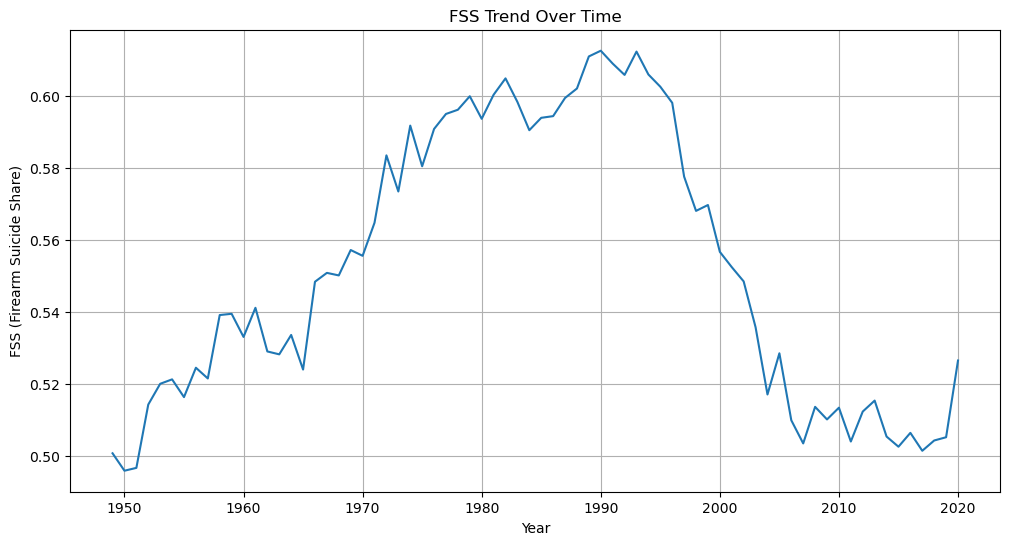

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='fss', errorbar=None)
plt.title("FSS Trend Over Time")
plt.xlabel("Year")
plt.ylabel("FSS (Firearm Suicide Share)")
plt.grid(True)
plt.show()


מגמת שיעור החזקת נשק (FSS) לאורך השנים:

נצפתה עלייה ברורה בשיעור החזקת נשק משנות ה-50 ועד תחילת שנות ה-90.

לאחר מכן ניכרת ירידה משמעותית בשיעור החזקת הנשק בעשורים האחרונים.

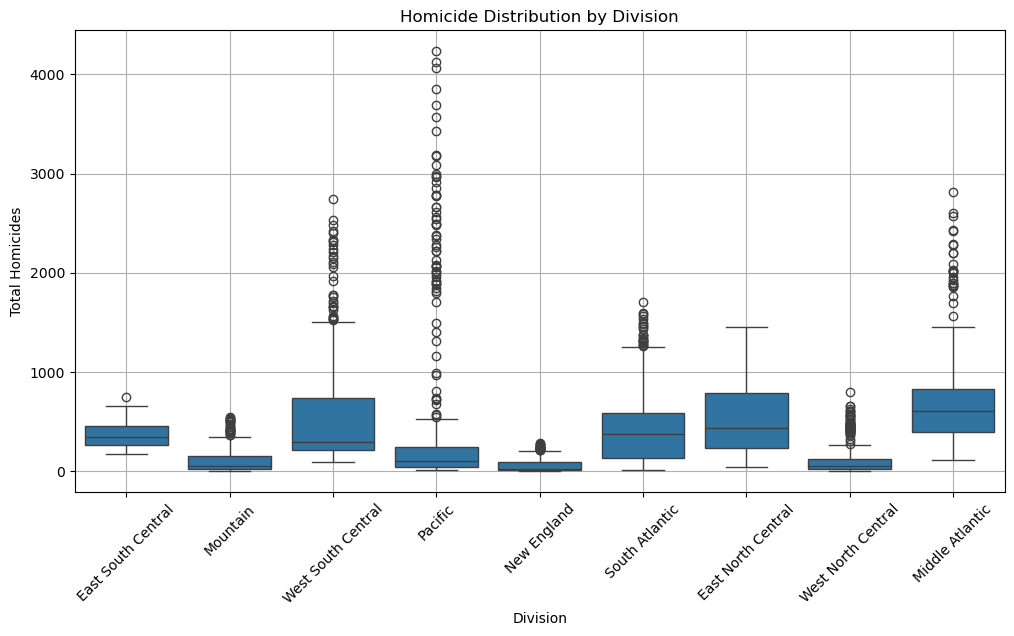

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='division', y='total_homicides')
plt.title("Homicide Distribution by Division")
plt.xlabel("Division")
plt.ylabel("Total Homicides")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

התפלגות מקרי הרצח לפי אזורים (division):

האזורים עם שיעור מקרי הרצח הגבוה ביותר:
West South Central (כולל טקסס), South Atlantic, Middle Atlantic.

האזורים עם השיעורים הנמוכים ביותר:
New England ו-Mountain.

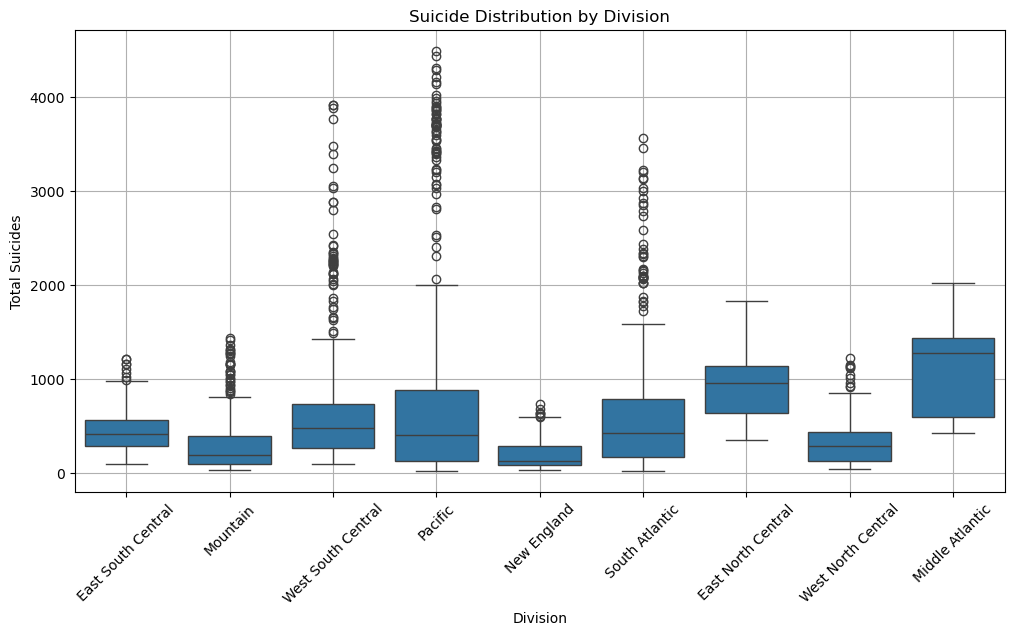

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='division', y='total_suicides')
plt.title("Suicide Distribution by Division")
plt.xlabel("Division")
plt.ylabel("Total Suicides")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


התפלגות מקרי ההתאבדות לפי אזורים:

אזור ה-Pacific מציג ערכים גבוהים יחסית.

אזור ה-New England שומר על שיעורים נמוכים יחסית.

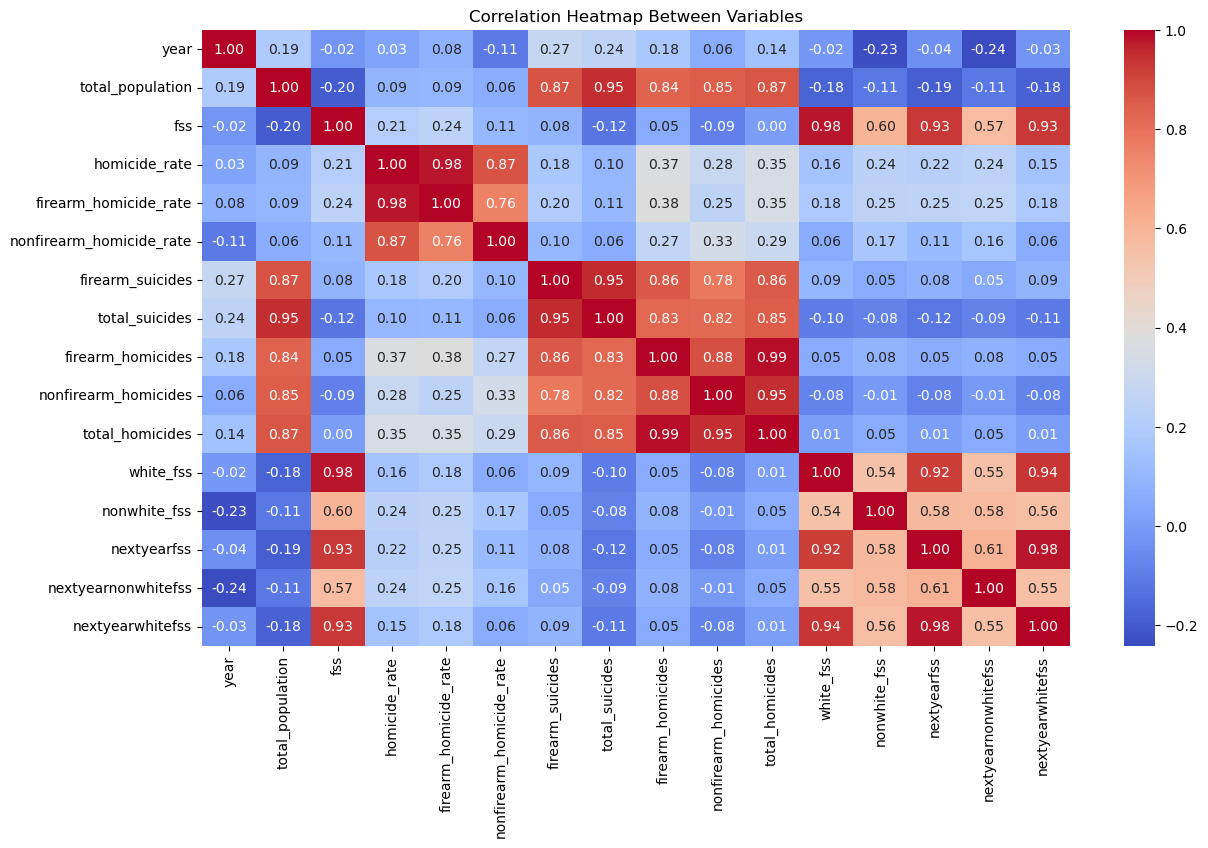

In [36]:
plt.figure(figsize=(14, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Variables")
plt.show()

מפת חום של קורלציות:
קשר חזק מאוד בין FSS ל-white_fss (0.98).
קשר חזק גם בין FSS לנתוני השנה הבאה (nextyearfss), מה שמעיד על השפעה אפשרית לטווח ארוך.
קשר בינוני בין FSS לשיעורי רצח עם נשק חם (כ-0.08 בלבד), אך זו קורלציה גולמית – נבדוק רגרסיה.

📈 ממצאים מרגרסיות:
קשר בין FSS לשיעור הרצח (homicide_rate):

המודל מובהק מאוד (P-Value < 0.0001).

המקדם החיובי: עלייה של 1 ביחידת FSS מעלה את שיעור הרצח ב-7.46 (לכל 100,000 תושבים).

R-squared נמוך (0.046) → FSS מסביר רק כ-4.6% מהשונות בשיעור הרצח. יש כנראה משתנים נוספים חשובים.

קשר בין FSS לשיעור ההתאבדויות (total_suicides):

המודל מובהק מאוד גם כאן (P-Value < 0.0001).

המקדם שלילי: ככל שה-FSS גבוה יותר, שיעור מקרי ההתאבדות הכללי דווקא יורד.

R-squared נמוך מאוד (0.015) → הקשר קיים אך ההשפעה חלשה.


📌 מסקנות בשלב זה:
יש קשר מובהק בין FSS לשיעורי הרצח, אך הוא לא חזק מבחינת יכולת ההסבר של המודל (R-squared נמוך).

דווקא לגבי התאבדויות, העלייה ב-FSS מקושרת לירידה בכמות הכוללת של התאבדויות — ייתכן שכאשר יש יותר נשק, נעשה שימוש בו יותר בהתאבדויות, אבל מספר ההתאבדויות הכולל לא בהכרח עולה.

המאמר מצא קשר חזק יותר, ייתכן שאת צריכה לבדוק את ההשפעה לטווח הארוך יותר (באמצעות nextyearfss) או לבדוק קשרים ברמה האזורית (division) ולא רק הארצית.

<Axes: >

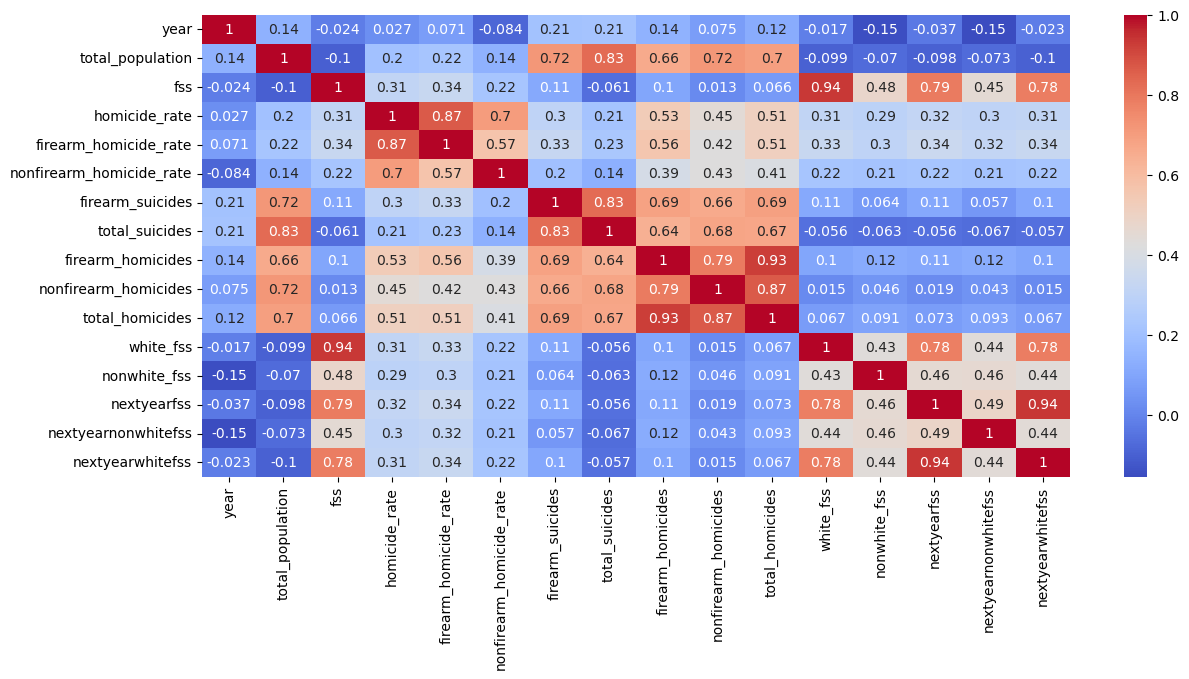

In [45]:
plt.figure(figsize=(14,6))
numeric_df = df.select_dtypes(include='number') 
correlation_matrix = numeric_df.corr(method='kendall').round(3)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')